<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week6/K_Means_Clustering_using_AppleStock_Historical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#K-Means Clustering using Apple Stock Historical

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd

# Ganti path dengan lokasi dataset di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/AAPL.csv'

# Membaca dataset dan mengubahnya menjadi DataFrame
df = pd.read_csv(file_path)

# Menampilkan DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [35]:
# Mengubah nama atribut/kolom
df = df.rename(columns={'Open': 'Open Stock', 'Close': 'Close Stock', 'Volume': 'Volume'})

# Menampilkan DataFrame
df.head()

,Date,Open Stock,High,Low,Close Stock,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [36]:
# Menghapus kolom "High", "Low" dan "Adj Close"
df = df.drop(['High', 'Low', 'Adj Close'], axis=1)

# Menampilkan DataFrame
df.head()

,Date,Open Stock,Close Stock,Volume
0,1980-12-12,0.513393,0.513393,117258400.0
1,1980-12-15,0.488839,0.486607,43971200.0
2,1980-12-16,0.453125,0.450893,26432000.0
3,1980-12-17,0.462054,0.462054,21610400.0
4,1980-12-18,0.475446,0.475446,18362400.0


In [37]:
# Mengganti nilai NaN dengan nilai mean pada kolom 'Open Stock'
mean_open_stock = df['Open Stock'].mean()
df['Open Stock'].fillna(mean_open_stock, inplace=True)

# Mengganti nilai NaN dengan nilai mean pada kolom 'Close Stock'
mean_close_stock = df['Close Stock'].mean()
df['Close Stock'].fillna(mean_close_stock, inplace=True)

# Mengganti nilai NaN dengan nilai mean pada kolom 'Volume'
mean_volume = df['Volume'].mean()
df['Volume'].fillna(mean_volume, inplace=True)
df

,Date,Open Stock,Close Stock,Volume
0,1980-12-12,0.513393,0.513393,117258400.0
1,1980-12-15,0.488839,0.486607,43971200.0
2,1980-12-16,0.453125,0.450893,26432000.0
3,1980-12-17,0.462054,0.462054,21610400.0
4,1980-12-18,0.475446,0.475446,18362400.0
...,...,...,...,...
9818,2019-11-19,267.899994,266.290009,19041800.0
9819,2019-11-20,265.540009,263.190002,26558600.0
9820,2019-11-21,263.690002,262.010010,30348800.0
9821,2019-11-22,262.589996,261.779999,16331300.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

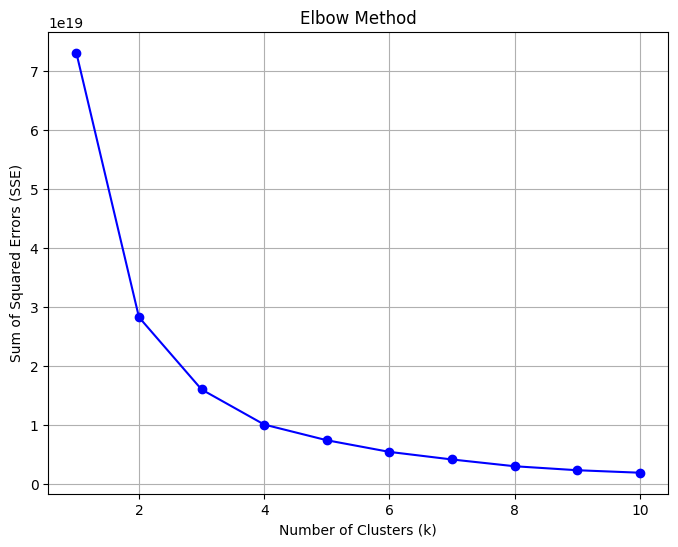

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil kolom yang akan digunakan untuk klastering
data = df[['Open Stock', 'Close Stock', 'Volume']]

# Menyimpan nilai SSE (Sum of Squared Errors) untuk berbagai jumlah kluster (k) dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


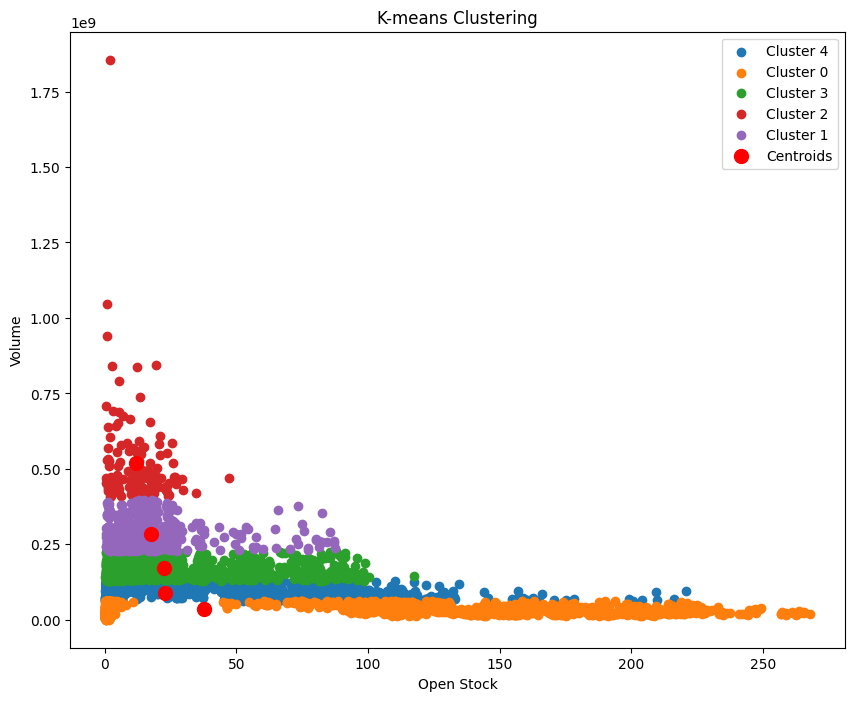

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi hasil klastering
plt.figure(figsize=(10, 8))

# Menggunakan scatter plot untuk memvisualisasikan data dalam setiap kluster
for label in df['label'].unique():
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Open Stock'], cluster_data['Volume'], label=f'Cluster {label}')

# Menambahkan centroid kluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Open Stock')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Menghitung Silhouette Score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan nilai Silhouette Score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.7229728095691231
Silhouette Score for k=3: 0.6588813528117003
Silhouette Score for k=4: 0.6133132308869002
Silhouette Score for k=5: 0.5899923012166529
Silhouette Score for k=6: 0.5861897584118054
Silhouette Score for k=7: 0.5871359852280841
Silhouette Score for k=8: 0.5592220527009986
Silhouette Score for k=9: 0.5544097786780607
Silhouette Score for k=10: 0.5358367924335317


In [41]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)  # Menghitung Davies-Bouldin Index
    dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.5338155619410977
Davies-Bouldin Index for k=3: 0.5497060781217709
Davies-Bouldin Index for k=4: 0.5239434929596387
Davies-Bouldin Index for k=5: 0.5428980442988913
Davies-Bouldin Index for k=6: 0.5415717822239302
Davies-Bouldin Index for k=7: 0.46550836084532016
Davies-Bouldin Index for k=8: 0.47404016534320703
Davies-Bouldin Index for k=9: 0.46834329210689923
Davies-Bouldin Index for k=10: 0.4778187016445317


In [42]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch_score = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores[k] = ch_score

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, ch_score in calinski_harabasz_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {ch_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 15543.927044893397
Calinski-Harabasz Index for k=3: 17432.01934062664
Calinski-Harabasz Index for k=4: 20359.221892705667
Calinski-Harabasz Index for k=5: 21575.265819003554
Calinski-Harabasz Index for k=6: 24165.26194369665
Calinski-Harabasz Index for k=7: 26782.439642201833
Calinski-Harabasz Index for k=8: 32065.476239114036
Calinski-Harabasz Index for k=9: 36323.5647326012
Calinski-Harabasz Index for k=10: 39435.96908713041
